In [29]:
import torch
import torch.nn as nn
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, outputs, masks):
        smooth = 1e-5
        outputs = torch.sigmoid(outputs)
        intersection = (outputs * masks).sum()
        dice = (2. * intersection + smooth) / (outputs.sum() + masks.sum() + smooth)
        return 1 - dice
class CombinedLoss(nn.Module):
    def __init__(self, weight_dice=0.6, weight_bce=0.4):
        super(CombinedLoss, self).__init__()
        self.dice_loss = DiceLoss()  # Replace DiceLoss with your implementation
        self.bce_loss = nn.BCEWithLogitsLoss()
        self.weight_dice = weight_dice
        self.weight_bce = weight_bce

    def forward(self, pred, target):
        dice_loss_value = self.dice_loss(pred, target)
        bce_loss_value = self.bce_loss(pred, target)
        return self.weight_dice * dice_loss_value + self.weight_bce * bce_loss_value

In [36]:
# Load the trained model weights
trained_model_path = '/kaggle/input/trained-raunet/trained_model.pth'
if model is not None:
    try:
        state_dict = torch.load(trained_model_path)
        print("Keys in the loaded state dict:", state_dict.keys())
        
        if "model_state_dict" in state_dict:
            model.load_state_dict(state_dict["model_state_dict"])
            print("Trained model weights loaded successfully!")
        else:
            model.load_state_dict(state_dict, strict=False)
            print("Trained model weights loaded with strict=False.")
        
        # Set the model to evaluation mode
        model.eval()
        print("Model set to evaluation mode.")
    except Exception as e:
        print(f"Error loading trained model weights: {e}")
else:
    print("Model initialization failed. Cannot load weights or set to eval mode.")


<ipython-input-36-97d2343f9814>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(trained_model_path)


Keys in the loaded state dict: dict_keys(['model_state_dict', 'optimizer_state_dict', 'epoch', 'loss'])
Trained model weights loaded successfully!
Model set to evaluation mode.


In [37]:
import sys
import os
import torch

# Model path where RAUNet.py is located
model_path = '/kaggle/input/raunet'
if model_path not in sys.path:
    sys.path.append(model_path)

# Attempt to import RAUNet
try:
    import sys
    sys.path.append('/kaggle/input/raunet')
    from RAUNet import RAUNet
    print("RAUNet model successfully imported!")
except ImportError as e:
    print(f"Error importing RAUNet: {e}")
    raise

# Initialize the RAUNet model
model = None
try:
    model = RAUNet(num_classes=1, num_channels=3, pretrained=False)
    print("Model initialized successfully!")
    print(model)
except Exception as e:
    print(f"Error initializing RAUNet: {e}")

# Load the trained model weights
trained_model_path = '/kaggle/input/trained-raunet/trained_model.pth'
if model is not None:
    try:
        checkpoint = torch.load(trained_model_path)
        model.load_state_dict(checkpoint['model_state_dict'], strict=False)
        print("Trained model weights loaded successfully!")
        
        # Set the model to evaluation mode
        model.eval()
        print("Model set to evaluation mode.")
    except Exception as e:
        print(f"Error loading trained model weights: {e}")
else:
    print("Model initialization failed. Cannot load weights or set to eval mode.")


RAUNet model successfully imported!


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model initialized successfully!
RAUNet(
  (firstconv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (firstbn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (firstrelu): ReLU(inplace=True)
  (firstmaxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

<ipython-input-37-33452b7066b9>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(trained_model_path)


Trained model weights loaded successfully!
Model set to evaluation mode.


In [31]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import os
import albumentations as A
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch

class CustomDataset(Dataset):
    def __init__(self, images_path, masks_path, transform=None):
        self.images_path = images_path
        self.masks_path = masks_path
        self.images = os.listdir(images_path)
        self.transform = transform  # Add transform argument
        self.scaler = MinMaxScaler(feature_range=(0, 1))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_file = self.images[idx]
        img_path = os.path.join(self.images_path, image_file)

        # Extract the base filename without extension, considering augmentation pattern
        base_filename = image_file[:-4]  # Remove ".jpg" or other extension
        if '_aug_' in base_filename:
            parts = base_filename.rsplit('_aug_', 1)
            base_filename = parts[0]  # Part before '_aug_'
            aug_suffix = '_aug_' + parts[1]  # Part after '_aug_' including '_aug_'
        else:
            aug_suffix = ''  # No augmentation suffix

        # Construct the mask filename using the refined convention
        mask_filename = base_filename + "_mask" + aug_suffix + ".jpg"
        mask_path = os.path.join(self.masks_path, mask_filename)

        # Read and normalize the image and mask
        image = read_image(img_path).float() / 255.0
        mask = read_image(mask_path).float() / 255.0

        # Convert to NumPy arrays for processing
        image_np = image.permute(1, 2, 0).numpy()  # Transpose to (H, W, C)
        mask_np = mask.permute(1, 2, 0).numpy()

        # Apply Min-Max normalization using Scikit-learn
        image_np_reshaped = image_np.reshape(-1, 3)  # Reshape to (H*W, C)
        normalized_image_np = self.scaler.fit_transform(image_np_reshaped)  # Normalize
        
        # Reshape back to original image shape (H, W, C)
        normalized_image_np = normalized_image_np.reshape(image_np.shape)

        # Apply transform if provided
        if self.transform:
            augmented = self.transform(image=normalized_image_np, mask=mask_np)  # Assuming albumentations transform
            normalized_image_np = augmented['image']
            mask_np = augmented['mask']

        # Convert back to PyTorch tensors and permute dimensions for model input
        image_tensor = torch.from_numpy(normalized_image_np).permute(2, 0, 1)  # Transpose back to (C, H, W)
        mask_tensor = torch.from_numpy(mask_np).permute(2, 0, 1)

        return image_tensor, mask_tensor


In [32]:
test_images_path = '/kaggle/input/test-data/test/images'
test_masks_path = '/kaggle/input/test-data/test/masks'
test_dataset = CustomDataset(test_images_path, test_masks_path)

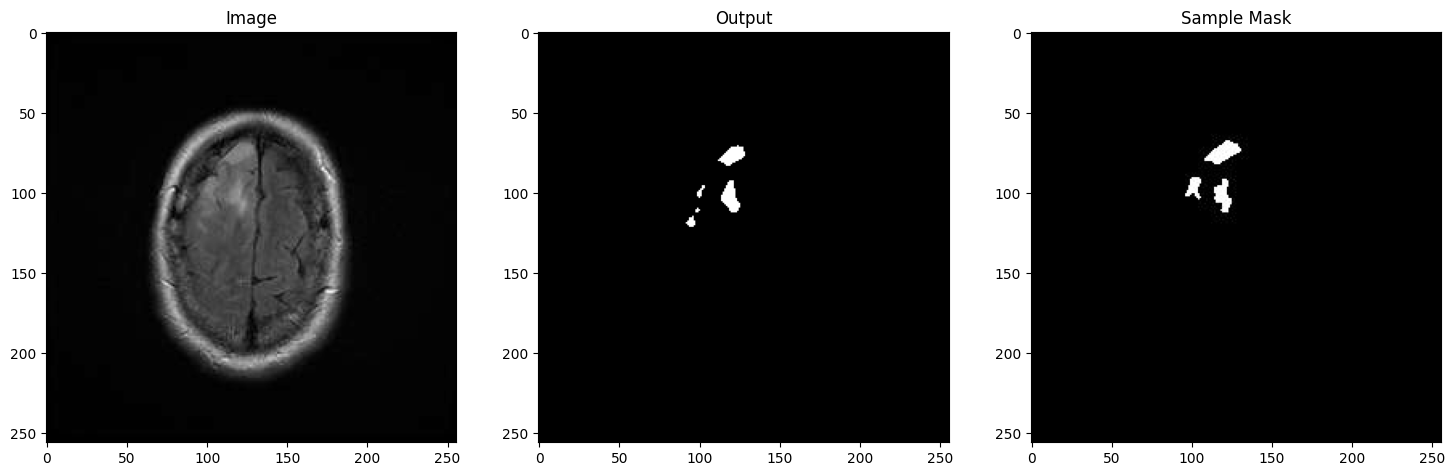

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()  # Set the model to evaluation mode

img, mask = test_dataset[45]
img = img.to(device)
mask = mask.to(device)

with torch.no_grad():
    out = model(img.unsqueeze(0))
    out = (out > 0.5).to(torch.uint8)

out = out.cpu()
img = img.cpu()
mask = mask.cpu()

import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.title("Image")

plt.subplot(1, 3, 2)
plt.imshow(out.squeeze().detach().numpy(), cmap='gray')
plt.title("Output")

plt.subplot(1, 3, 3)
plt.imshow(mask[0].squeeze().numpy(), cmap='gray')
plt.title("Sample Mask")

plt.show()
